In [1]:
%%cython

cdef extern from 'gsl/gsl_rng.h':
   ctypedef struct gsl_rng_type:
      pass
   ctypedef struct gsl_rng:
       pass
   gsl_rng_type *gsl_rng_mt19937
   gsl_rng *gsl_rng_alloc(gsl_rng_type * T)
  
cdef gsl_rng *r = gsl_rng_alloc(gsl_rng_mt19937)

cdef extern from 'gsl/gsl_randist.h':
     long int uniform 'gsl_rng_uniform_int'(gsl_rng * r, unsigned long int n)

def bit_aleatorio():
    cdef int n
    n = uniform(r,2)
    return n

In [2]:
print [bit_aleatorio() for muda in range(10)]

[1, 0, 0, 1, 0, 0, 1, 1, 1, 1]


In [3]:
%time L=[bit_aleatorio() for _ in srange(1024*1024)]

CPU times: user 300 ms, sys: 24 ms, total: 324 ms
Wall time: 372 ms


In [4]:
from string import *

def archivo(L):
    C = ''
    while L != []:
        C += (chr(int(join(map(str,L[:8]),sep=''),base=2)))
        L = L[8:]
    outfile = open("prueba-bits","wb") #Abrimos el archivo para escribir en el
    outfile.write(C)                        #Escribimos la cadena C al archivo
    outfile.close()                         #Cerramos el archivo

In [5]:
%time archivo(L)

CPU times: user 4min 57s, sys: 1.77 s, total: 4min 58s
Wall time: 5min 3s


In [6]:
from string import *

def archivo2(N,filename):
    outfile = open(filename,"wb")
    for muda in xrange(N):
        L = [bit_aleatorio() for _ in range(8)]
        C = (chr(int(join(map(str,L),sep=''),base=2)))
        outfile.write(C)                        
    outfile.close()       

In [7]:
%time archivo2(1024*1024//8,"prueba-bits-3")

CPU times: user 736 ms, sys: 4 ms, total: 740 ms
Wall time: 741 ms


In [8]:
%time archivo2(2048*2048//8,"prueba-bits-4")

CPU times: user 2.88 s, sys: 4 ms, total: 2.88 s
Wall time: 2.89 s


## Con distintas probabilidades

In [9]:
%%cython

cdef extern from 'gsl/gsl_rng.h':
   ctypedef struct gsl_rng_type:
      pass
   ctypedef struct gsl_rng:
       pass
   gsl_rng_type *gsl_rng_mt19937
   gsl_rng *gsl_rng_alloc(gsl_rng_type * T)
  
cdef gsl_rng *r = gsl_rng_alloc(gsl_rng_mt19937)

cdef extern from 'gsl/gsl_randist.h':
     double uniform 'gsl_rng_uniform'(gsl_rng * r)

def dec_aleatorio():
    cdef double n
    n = uniform(r)
    return n

In [10]:
print [dec_aleatorio() for muda in range(10)]

[0.999741748906672, 0.16290987539105117, 0.28261780529282987, 0.9472010820172727, 0.23165654274635017, 0.48497361433692276, 0.9574769565369934, 0.7443053431343287, 0.5400436583440751, 0.7399529814720154]


In [11]:
def dado_trucado(p):
    x = dec_aleatorio()
    #print x
    if x < p:
        return 0
    else:
        return 1

In [12]:
from string import *
#from os import *


def archivo2p(N,p,filename):
    outfile = open(filename,"wb")
    for muda in xrange(N):
        L = [dado_trucado(p) for _ in range(8)]
        C = (chr(int(join(map(str,L),sep=''),base=2)))
        outfile.write(C)  
    outfile.close()
    
    

In [13]:

def generar_archivos(n):
    L = []
    for j in range(0,n+1):
        p = (j/n).n()
        filename = "/home/admin/Desktop/CLASE-2018-11-12/COMPRESION/prueba-bits"+'-'+str(p)
        #print p
        #os.chdir("/home/rhg/Desktop/COMPRESION/")
        archivo2p(2048*2048//8,p,filename)
        os.system("tar cvzf %s %s" %(filename+'.tar.gz',filename))
        tam = os.lstat(filename+'.tar.gz').st_size
        L.append((p,tam))
    return L

In [14]:
%time L = generar_archivos(20);print L

[(0.000000000000000, 688), (0.0500000000000000, 196956), (0.100000000000000, 294225), (0.150000000000000, 360455), (0.200000000000000, 406136), (0.250000000000000, 438169), (0.300000000000000, 468365), (0.350000000000000, 494059), (0.400000000000000, 512408), (0.450000000000000, 523303), (0.500000000000000, 524657), (0.550000000000000, 523318), (0.600000000000000, 512426), (0.650000000000000, 494053), (0.700000000000000, 468124), (0.750000000000000, 438280), (0.800000000000000, 406084), (0.850000000000000, 360519), (0.900000000000000, 294289), (0.950000000000000, 197168), (1.00000000000000, 682)]
CPU times: user 3min 23s, sys: 812 ms, total: 3min 24s
Wall time: 3min 28s


In [15]:
2048*2048//8

524288

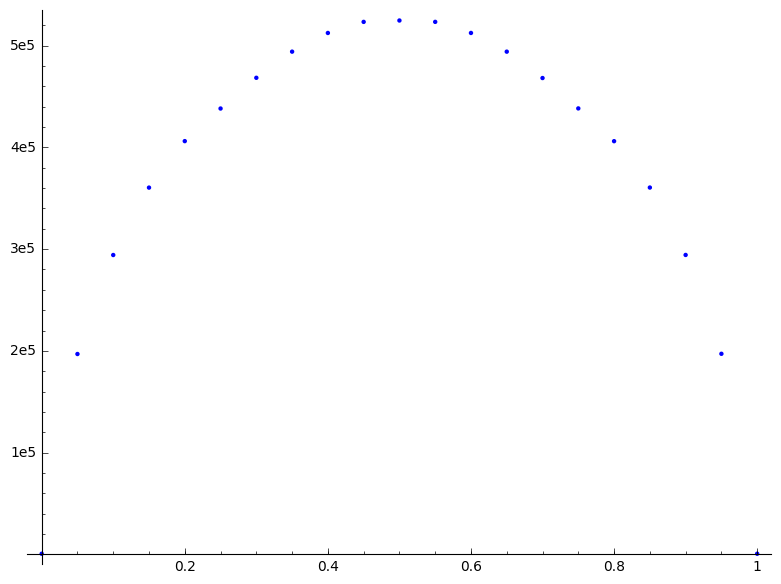

In [16]:
points(L)

In [17]:
var('a b c x'); model(x) = a*x^2+b*x+c
dicc = find_fit(L,model,solution_dict=True);print dicc

{b: 1871713.8972086462, c: 80500.96197695403, a: -1871658.8322755422}


In [18]:
def solucion(x,dicc):
    return dicc[a]*x**2+dicc[b]*x+dicc[c]

In [19]:
[(item[0],item[1]-solucion(item[0],dicc)) for item in L]

[(0.000000000000000, -79812.9619769540),
 (0.0500000000000000, 27548.4902433025),
 (0.100000000000000, 45269.2366249367),
 (0.150000000000000, 41309.2771679488),
 (0.200000000000000, 26158.6118723385),
 (0.250000000000000, 6718.24073810584),
 (0.300000000000000, -5200.83623474900),
 (0.350000000000000, -12263.6190462262),
 (0.400000000000000, -17313.1076963258),
 (0.450000000000000, -20458.3021850475),
 (0.500000000000000, -23786.2025123916),
 (0.550000000000000, -20448.8086783579),
 (0.600000000000000, -17306.1206829464),
 (0.650000000000000, -12286.1385261575),
 (0.700000000000000, -5463.86220799061),
 (0.750000000000000, 6801.70827155374),
 (0.800000000000000, 26073.5729124763),
 (0.850000000000000, 41334.7317147758),
 (0.900000000000000, 45289.1846784537),
 (0.950000000000000, 27710.9318035089),
 (1.00000000000000, -79874.0269100580)]

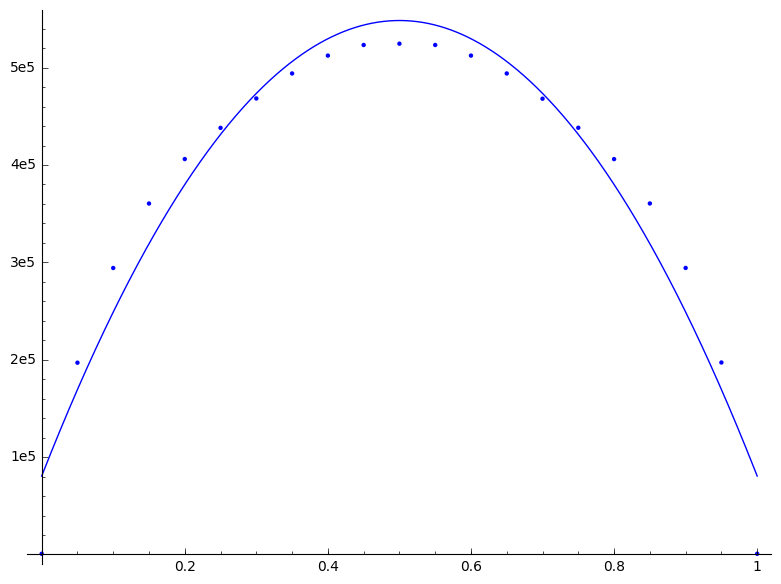

In [20]:
points(L)+plot(dicc[a]*x**2+dicc[b]*x+dicc[c],x,0,1)